In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy


df = pd.read_csv('Desktop/styles.csv',nrows=44416, error_bad_lines=False)

/var/folders/p_/f89n2mxs5zj__f5w8jwgv7c40000gn/T/ipykernel_82162/734898301.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('Desktop/styles.csv',nrows=44416, error_bad_lines=False)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: 

In [72]:
df.shape

(44416, 10)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44416 entries, 0 to 44415
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44416 non-null  int64  
 1   gender              44416 non-null  object 
 2   masterCategory      44416 non-null  object 
 3   subCategory         44416 non-null  object 
 4   articleType         44416 non-null  object 
 5   baseColour          44401 non-null  object 
 6   season              44395 non-null  object 
 7   year                44415 non-null  float64
 8   usage               44099 non-null  object 
 9   productDisplayName  44409 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [74]:
#Checking for missing values
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [75]:
df.describe()

,id,year
count,44416.00000,44415.000000
mean,29696.03832,2012.806372
std,17049.24735,2.126376
min,1163.00000,2007.000000
25%,14768.75000,2011.000000
50%,28618.50000,2012.000000
75%,44682.25000,2015.000000
max,60000.00000,2019.000000


In [76]:
df.corr()

,id,year
id,1.000000,0.414948
year,0.414948,1.000000


<b>Preprocessing</b>

In [77]:
#Dropping missing values
df.dropna(subset=["baseColour",'season','year','usage','productDisplayName'],axis=0,inplace=True)
df.shape

(44069, 10)

In [78]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


<b>EDA - Univarite</b>

In [79]:
#1.Gender
print("Gender and their number of data points : \n", df.gender.value_counts())

Gender and their number of data points : 
 Men       22106
Women     18352
Unisex     2126
Boys        830
Girls       655
Name: gender, dtype: int64


In [80]:
#2. masterCategory
print("masterCategory and their number of data points : \n", df.masterCategory.value_counts())

masterCategory and their number of data points : 
 Apparel           21363
Accessories       11243
Footwear           9195
Personal Care      2137
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64


In [81]:
#3. subCategory
print("subCategory and their number of data points : \n",df.subCategory.value_counts())

subCategory and their number of data points : 
 Topwear                     15384
Shoes                        7322
Bags                         3053
Bottomwear                   2686
Watches                      2541
Innerwear                    1806
Jewellery                    1079
Eyewear                      1073
Fragrance                    1000
Sandal                        961
Wallets                       925
Flip Flops                    912
Belts                         811
Socks                         698
Dress                         478
Loungewear and Nightwear      464
Saree                         427
Lips                          425
Headwear                      293
Nails                         278
Makeup                        262
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90


In [82]:
#4.articleType
print("articleType and their number of data points : \n",df.articleType.value_counts())

articleType and their number of data points : 
 Tshirts                7064
Shirts                 3214
Casual Shoes           2844
Watches                2541
Sports Shoes           2016
                       ... 
Mens Grooming Kit         1
Cushion Covers            1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: articleType, Length: 142, dtype: int64


In [83]:
#5.baseColour
print("baseColour and their number of data points : \n",df.baseColour.value_counts())

baseColour and their number of data points : 
 Black                9700
White                5496
Blue                 4904
Brown                3440
Grey                 2735
Red                  2433
Green                2103
Pink                 1822
Navy Blue            1784
Purple               1612
Silver               1089
Yellow                776
Beige                 745
Gold                  621
Maroon                577
Orange                523
Olive                 409
Multi                 394
Cream                 384
Steel                 315
Charcoal              228
Peach                 184
Off White             182
Skin                  163
Lavender              160
Grey Melange          146
Khaki                 139
Magenta               128
Teal                  119
Tan                   112
Mustard                97
Bronze                 89
Copper                 83
Turquoise Blue         69
Rust                   65
Burgundy               44
Metallic         

In [84]:
#6.Season
print("Season and their number of data points : \n",df.season.value_counts())

Season and their number of data points : 
 Summer    21437
Fall      11412
Winter     8510
Spring     2710
Name: season, dtype: int64


In [85]:
#7.Year
print("Year and their number of data points : \n",df.year.value_counts())

Year and their number of data points : 
 2012.0    16267
2011.0    13631
2016.0     5997
2015.0     2775
2017.0     2647
2013.0     1204
2010.0      846
2018.0      404
2014.0      236
2019.0       33
2009.0       20
2008.0        7
2007.0        2
Name: year, dtype: int64


In [86]:
#8.Usage
print("Usage and their number of data points : \n",df.usage.value_counts())

Usage and their number of data points : 
 Casual          34389
Sports           4004
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64


In [87]:
#9.productDisplayName
print("productDisplayName and their number of data points : \n",df.productDisplayName.value_counts())

productDisplayName and their number of data points : 
 Lucera Women Silver Earrings                            82
Lucera Women Silver Pendant                             56
Lucera Women Silver Ring                                50
Catwalk Women Black Heels                               48
Q&Q Men Black Dial Watch                                42
                                                        ..
U.S. Polo Assn. Men Brown Ankle Shoes                    1
SDL by Sweet Dreams Men Navy Blue & White Pyjama Set     1
Wills Lifestyle Women Black Shirt                        1
Flying Machine Women Printed Black Tshirts               1
Chimp Men Teja Main Hoon Blue Tshirts                    1
Name: productDisplayName, Length: 30800, dtype: int64


<b>EDA - Bivarite</b>

masterCategory,Accessories,Apparel,Footwear,Free Items,Home,Personal Care,Sporting Goods
gender,,,,,,,
Boys,17,759,54,0,0,0,0
Girls,28,567,60,0,0,0,0
Men,4402,11340,5740,53,0,571,0
Unisex,1479,85,512,9,1,15,25
Women,5317,8612,2829,43,0,1551,0


<AxesSubplot:xlabel='gender'>

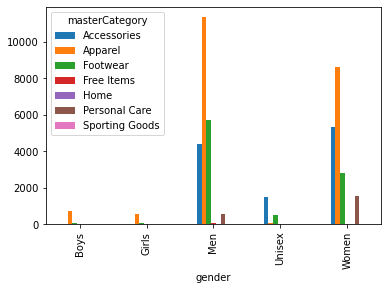

In [88]:

#1. Gender and 2. masterCategory

tab = pd.crosstab(index=df['gender'],columns=df['masterCategory'])
display(tab)
tab.plot.bar()
#sns.barplot(x=df['gender'],y= df["masterCategory"], orient='h')

masterCategory,Accessories,Apparel,Footwear,Free Items,Home,Personal Care,Sporting Goods
season,,,,,,,
Fall,1206,7714,2480,0,1,0,11
Spring,102,138,366,5,0,2099,0
Summer,4557,12643,4144,44,0,37,12
Winter,5378,868,2205,56,0,1,2


<AxesSubplot:xlabel='season'>

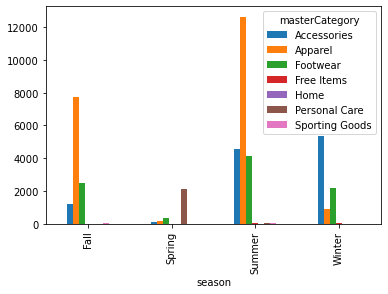

In [89]:

#6. Season and 2. masterCategory

tab = pd.crosstab(index=df['season'],columns=df['masterCategory'])
display(tab)
tab.plot.bar()
#sns.barplot(x=df['gender'],y= df["masterCategory"], orient='h')

gender,Boys,Girls,Men,Unisex,Women
baseColour,,,,,
Beige,6,2,212,24,501
Black,83,41,5874,761,2941
Blue,159,102,2673,263,1707
Bronze,0,0,10,0,79
Brown,10,3,1942,123,1362
Burgundy,0,0,18,0,26
Charcoal,1,0,184,3,40
Coffee Brown,0,0,11,0,18
Copper,0,0,41,0,42


<AxesSubplot:xlabel='baseColour'>

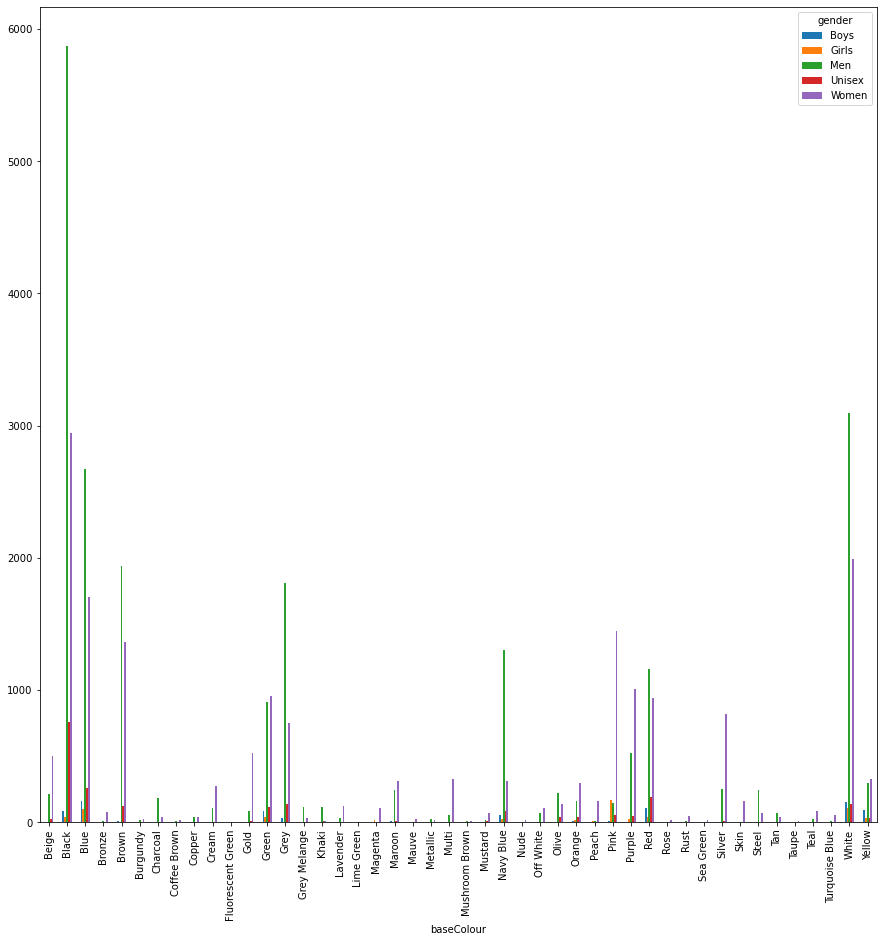

In [90]:

#1. Gender and 5. baseColour

tab = pd.crosstab(index=df['baseColour'],columns=df['gender'])
display(tab)

tab.plot(kind='bar',figsize=(15,15))

masterCategory,Accessories,Apparel,Footwear,Free Items,Home,Personal Care,Sporting Goods
baseColour,,,,,,,
Beige,202,342,177,0,0,24,0
Black,3294,3194,2931,33,0,243,5
Blue,709,3433,545,14,0,200,3
Bronze,29,0,43,1,0,16,0
Brown,1306,564,1337,2,0,228,3
Burgundy,6,24,2,0,0,12,0
Charcoal,19,179,27,1,0,2,0
Coffee Brown,12,8,7,0,0,2,0
Copper,58,0,11,0,0,14,0


<AxesSubplot:xlabel='baseColour'>

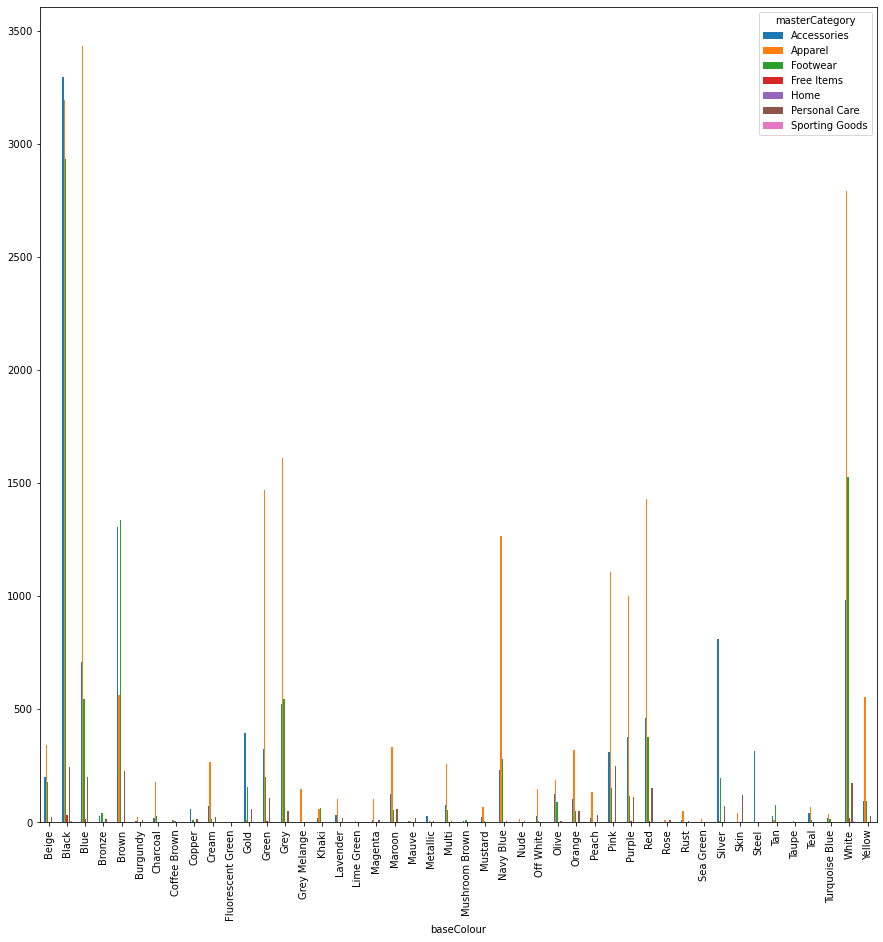

In [91]:

#2. masterCategory and 5. baseColour

tab = pd.crosstab(index=df['baseColour'],columns=df['masterCategory'])
display(tab)

tab.plot(kind='bar',figsize=(15,15))

masterCategory,Accessories,Apparel,Footwear,Free Items,Home,Personal Care,Sporting Goods
subCategory,,,,,,,
Accessories,129,0,0,0,0,0,0
Apparel Set,0,106,0,0,0,0,0
Bags,3053,0,0,0,0,0,0
Bath and Body,0,0,0,0,0,9,0
Beauty Accessories,0,0,0,0,0,3,0
Belts,811,0,0,0,0,0,0
Bottomwear,0,2686,0,0,0,0,0
Cufflinks,108,0,0,0,0,0,0
Dress,0,478,0,0,0,0,0


<AxesSubplot:xlabel='subCategory'>

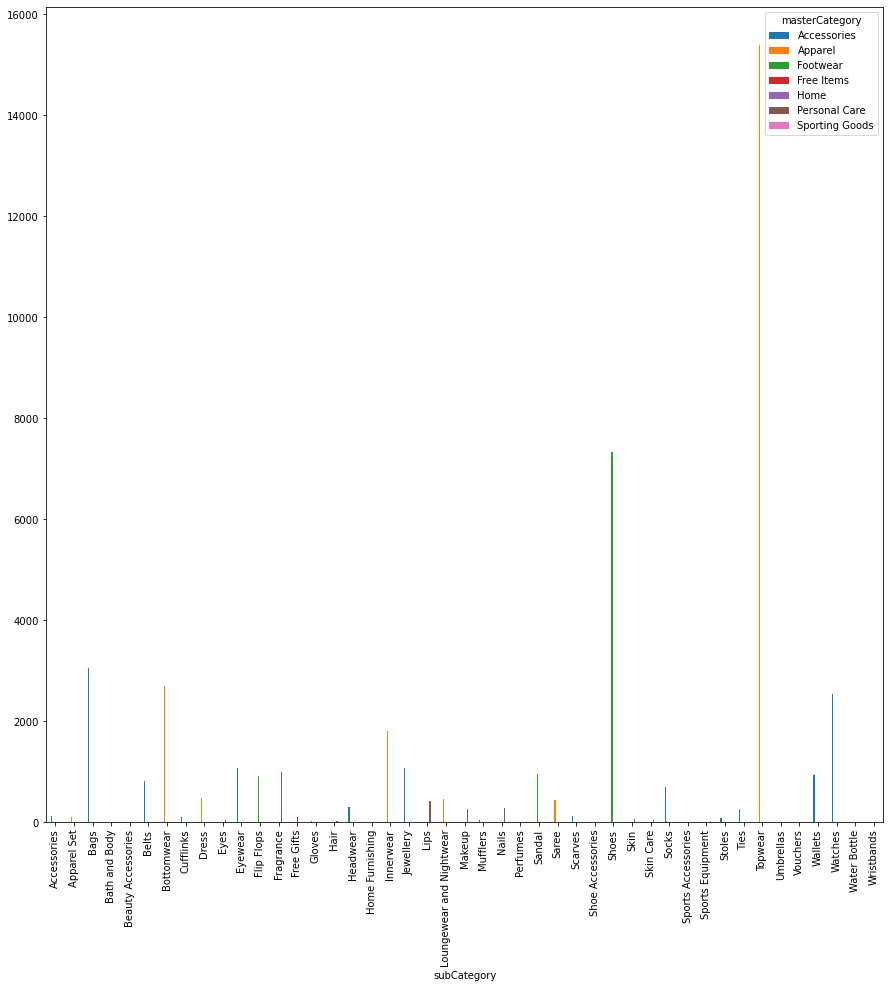

In [92]:

#2. masterCategory and 5. subCategory

tab = pd.crosstab(index=df['subCategory'],columns=df['masterCategory'])
display(tab)

tab.plot(kind='bar',figsize=(15,15))

<b>EDA - Multivariate</b>

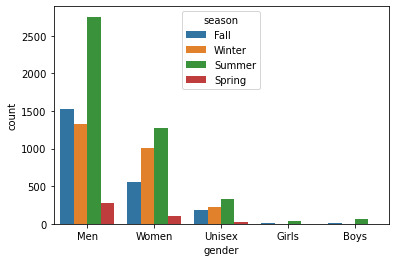

In [145]:
#1.Gender, #5.Colour and #6.Season
#Determining a colour is popular amongst which group of people based on genders during various seasons
#Eg. Black

filtered_df = df.loc[df['baseColour'] == 'Black']
sns.countplot(x='gender', hue='season', data=filtered_df)

plt.show()

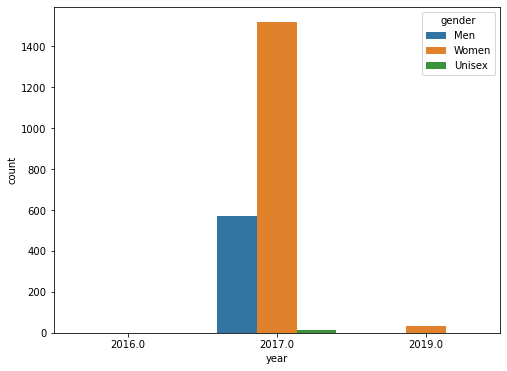

In [162]:
#1.Gender, #2.masterCategory and #7.year
#Determining a type of product had how many listings for different genders across years
#Eg. Personal Care products

filtered_df = df.loc[df['masterCategory'] == 'Personal Care']
plt.figure(figsize=(8, 6))
sns.countplot(x='year', hue='gender', data=filtered_df)

plt.show()